In [ ]:
from factory import Factory

In [4]:
factory = Factory("test_1.txt", seed=200)

In [5]:
from deap import base, tools, creator, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [6]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateSwapDayOrder, factory.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateTruckSchedule(individual)
	return (buffer.total_cost, )


In [7]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, factory.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

factory.resigterIndividualClass(creator.individual)

In [8]:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTruck)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [9]:
## build and run the GA
size = 200
starting_pop = toolbox.populationInit(size)
buffer = factory.evaluateTruckSchedule(starting_pop[0])
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(5)
eval = factory.evaluateTruckSchedule(starting_pop[0])
print(eval)


TruckEvalSheet(total_truck_dist=151212.3402921411, total_truck=85, max_truck=9, truck_violation=0, penalty=0, total_cost=15121251529)


gen	nevals	min        	avg        
0  	200   	1.40865e+10	1.48057e+10
1  	168   	1.38835e+10	1.6e+25    
2  	165   	1.38317e+10	1.28e+25   
3  	149   	1.37703e+10	3.36e+25   
4  	164   	1.37971e+10	3.68e+25   
5  	167   	1.35978e+10	1.76e+25   
6  	163   	1.35978e+10	1.76e+25   
7  	160   	1.35716e+10	2.24e+25   
8  	160   	1.35257e+10	5.92e+25   
9  	161   	1.3366e+10 	1.28e+25   
10 	156   	1.3366e+10 	3.68e+25   
11 	162   	1.32499e+10	2.4e+25    
12 	154   	1.33321e+10	3.68e+25   
13 	176   	1.3216e+10 	9.6e+24    
14 	166   	1.32468e+10	5.44e+25   
15 	165   	1.3128e+10 	2.4e+25    
16 	150   	1.3128e+10 	1.28e+25   
17 	156   	1.3128e+10 	2.08e+25   
18 	168   	1.3128e+10 	1.28e+25   
19 	164   	1.31152e+10	1.3324e+10 
20 	175   	1.31152e+10	2.08e+25   
21 	142   	1.30766e+10	1.6e+24    
22 	168   	1.30766e+10	3.68e+25   
23 	159   	1.30614e+10	1.31817e+10
24 	144   	1.30439e+10	1.6e+25    
25 	166   	1.30097e+10	2.24e+25   
26 	172   	1.30097e+10	3.84e+25   
27 	172   	1.29756e+

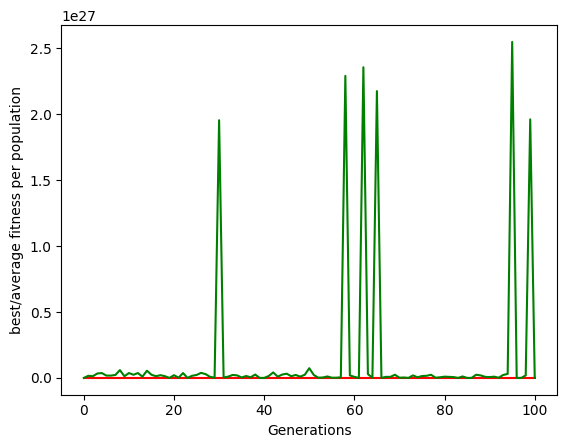

In [10]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 100

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

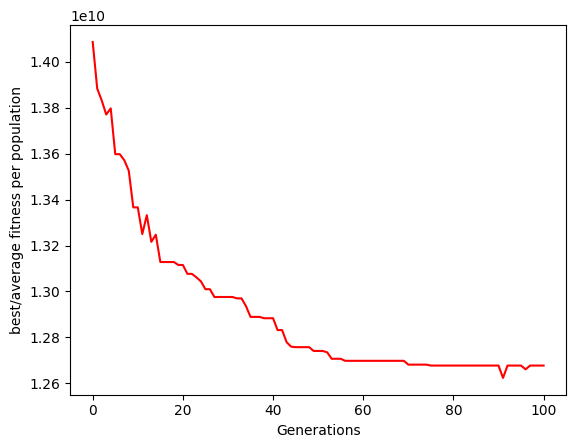

In [11]:
plt.plot(logbook.select("min"), color='red')
# plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [12]:

res = factory.evaluateTruckSchedule(hof[0])
print(res)
print(hof[0]) #12297372635

TruckEvalSheet(total_truck_dist=126233.38444321716, total_truck=71, max_truck=7, truck_violation=0, penalty=0, total_cost=12623352544)
[0, 10, 2, 9, 3, 11, 1, 0, 7, 4, 0, 20, 23, 21, 22, 26, 16, 27, 17, 28, 8, 6, 13, 12, 5, 15, 14, 0, 34, 33, 25, 19, 0, 32, 35, 18, 37, 31, 38, 30, 36, 29, 24, 0, 45, 46, 48, 42, 41, 47, 39, 40, 0, 50, 44, 43, 54, 51, 52, 49, 53, 0, 57, 56, 0, 58, 62, 55, 0, 59, 0, 64, 66, 61, 65, 60, 67, 63, 0, 72, 71, 69, 68, 0, 74, 76, 75, 73, 70, 77, 0, 78, 79, 0, 82, 84, 83, 85, 80, 0, 89, 0, 88, 81, 0, 99, 93, 97, 90, 0, 101, 87, 96, 104, 100, 95, 94, 105, 92, 91, 103, 86, 0, 111, 112, 102, 116, 109, 110, 107, 115, 113, 108, 114, 106, 98, 0, 117, 0, 120, 118, 121, 119, 0, 0, 0, 123, 128, 134, 126, 124, 131, 127, 133, 125, 122, 0, 130, 129, 136, 135, 0, 141, 132, 140, 138, 142, 139, 137, 0, 147, 144, 0, 145, 150, 149, 148, 146, 143, 0, 0, 0, 0, 0]


In [13]:
def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateTechScramble, factory.mutateTechSwap]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = factory.evaluateSchedule(individual)
	return (buffer.cal_cost(factory), )

In [14]:
factory.resigterTruckScheduleRef(hof[0])
toolbox.register("individualInit", tools.initIterate, creator.individual, factory.technicianInit)
toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)
toolbox.register("evaluate", fitness)
toolbox.register("mate", factory.crossoverTech)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [15]:
## build and run the GA
size = 200
starting_pop = toolbox.populationInit(size)
hof2 = tools.HallOfFame(5)

gen	nevals	min        	avg        
0  	200   	1.27439e+10	1.27439e+10
1  	152   	1.27439e+10	1.27454e+10
2  	163   	1.27439e+10	1.27456e+10
3  	152   	1.27439e+10	1.27458e+10
4  	171   	1.27439e+10	1.27458e+10
5  	153   	1.27439e+10	1.27458e+10
6  	165   	1.27439e+10	1.27459e+10
7  	170   	1.27439e+10	1.27459e+10
8  	149   	1.27439e+10	1.27457e+10
9  	154   	1.27439e+10	1.27457e+10
10 	165   	1.27439e+10	1.27458e+10
11 	166   	1.27439e+10	1.27458e+10
12 	166   	1.27439e+10	1.27461e+10
13 	156   	1.27439e+10	1.27459e+10
14 	162   	1.27439e+10	1.27458e+10
15 	157   	1.27439e+10	1.27458e+10
16 	165   	1.27439e+10	1.27458e+10
17 	162   	1.27439e+10	1.27459e+10
18 	171   	1.27439e+10	1.27459e+10
19 	168   	1.27439e+10	1.27459e+10
20 	169   	1.27439e+10	1.27458e+10
21 	161   	1.27439e+10	1.27458e+10
22 	166   	1.27439e+10	1.27457e+10
23 	158   	1.27439e+10	1.27459e+10
24 	165   	1.27439e+10	1.27459e+10
25 	165   	1.27439e+10	1.27458e+10
26 	170   	1.27439e+10	1.27459e+10
27 	166   	1.27439e+

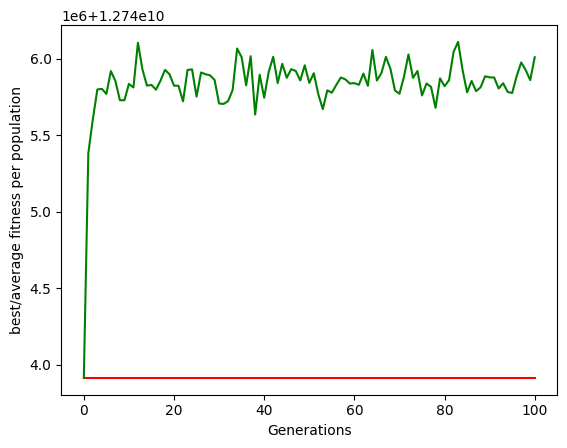

In [16]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 100

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof2,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

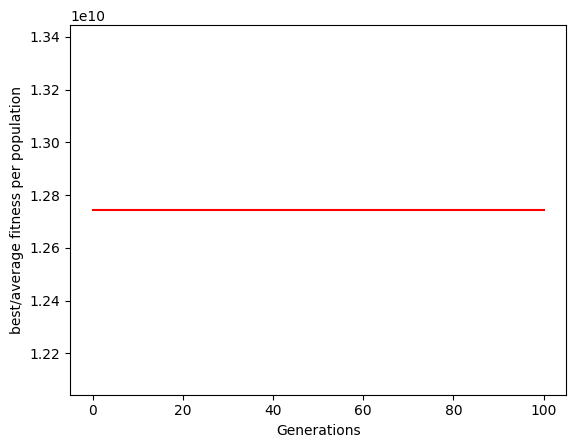

In [17]:
plt.plot(logbook.select("min"), color='red')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [20]:
eval = factory.evaluateSchedule(hof2[0])
print(eval)
print(eval.cal_cost(factory))

EvalSheet(truck=TruckEvalSheet(total_truck_dist=126233.38444321716, total_truck=78, max_truck=7, truck_violation=0, penalty=0, total_cost=12623353244), tech=TechEvalSheet(tech_violation=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], tech_penalty=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], total_tech_dist=10671.40583509055, no_tech_employed=33306977486266366156783, total_tech_deployed=138, idle_machine_cost=0, total_tech_penalty=0, total_cost=120559058))
12743912302
